<a href="https://colab.research.google.com/github/vnaudoori28/LogicMojo_AIML_Practice/blob/main/Lakshmi_Linear_Regression_Bike_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')


In [2]:
###3 Analyse the price movements and most important relationships it has in thw given data

In [3]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Read the csv file using 'read_csv'. Please write your dataset location here.

#from google.colab import drive
#drive.mount('/content/drive')


In [5]:
import gdown


In [6]:
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing.csv')
#df = pd.read_csv('/content/drive/MyDrive/AI_ML_Course/Assignment/LinearRegression/ExampleHousingDatasetLinearRegression.csv')

#https://drive.google.com/file/d/17bwpEoxe1mfB0bjeQvH3l0fWE6WMqH3k/view?usp=drive_link
#df.head()

#Bike  data
# Read the excel file using 'read_excel'. Please write your dataset location here.
# Dataset location - https://docs.google.com/spreadsheets/d/1IoOWPH25lak4DwSlZMRTfeimPP2yCUrE5y8Axxxw8wo/edit?usp=drive_link
#https://docs.google.com/spreadsheets/d/1IoOWPH25lak4DwSlZMRTfeimPP2yCUrE5y8Axxxw8wo/edit?usp=sharing
#https://docs.google.com/spreadsheets/d/1IoOWPH25lak4DwSlZMRTfeimPP2yCUrE5y8Axxxw8wo/edit?usp=sharing

file_id = "1IoOWPH25lak4DwSlZMRTfeimPP2yCUrE5y8Axxxw8wo"

# Local filename for saving
output = "drive_file.xlsx"

# Download from Google Drive
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False, fuzzy=True)

# Read into pandas
df = pd.read_excel(output)

# Check sample rows
print(df.head())

Downloading...
From (original): https://drive.google.com/uc?id=1IoOWPH25lak4DwSlZMRTfeimPP2yCUrE5y8Axxxw8wo
From (redirected): https://docs.google.com/spreadsheets/d/1IoOWPH25lak4DwSlZMRTfeimPP2yCUrE5y8Axxxw8wo/export?format=xlsx
To: /content/drive_file.xlsx
65.2kB [00:00, 11.6MB/s]


   instant               dteday  season  yr  mnth  holiday  weekday  \
0        1  2018-01-01 00:00:00       1   0     1        0        1   
1        2  2018-02-01 00:00:00       1   0     1        0        2   
2        3  2018-03-01 00:00:00       1   0     1        0        3   
3        4  2018-04-01 00:00:00       1   0     1        0        4   
4        5  2018-05-01 00:00:00       1   0     1        0        5   

   workingday  weathersit       temp     atemp      hum  windspeed  casual  \
0           1           2  14.110847  18.18125  80.5833  10.749882     331   
1           1           2  14.902598  17.68695  69.6087  16.652113     131   
2           1           1   8.050924   9.47025  43.7273  16.636703     120   
3           1           1   8.200000  10.60610  59.0435  10.739832     108   
4           1           1   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt  
0         654   985  
1         670   801  
2        1229  1349  
3        1454  1

In [7]:
#Y = B0 + B1X1 + B2X2 ........

In [8]:
df.shape

(730, 16)

In [9]:
#### 1. EDA - Null Analysis / Outlier Analysis / Dropping of Column
##### 2. Univariate . Multivariate Analysis
##### 3. Feature Engineerring - Dimensionality Reduction, One Hot Encoding , Scaling
###### 4. testing Assumptions of Linear regression
##### 5. Building a model on train data set
###### 6. Validating the model on test data set
##### 7. Check for accuracy of the model, retrain / adjust if not up to the mark


In [10]:
#create a copy of df

df_orig = df.copy()

In [11]:
#Check for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
# All columns have data in all 730 rows. hence no null values

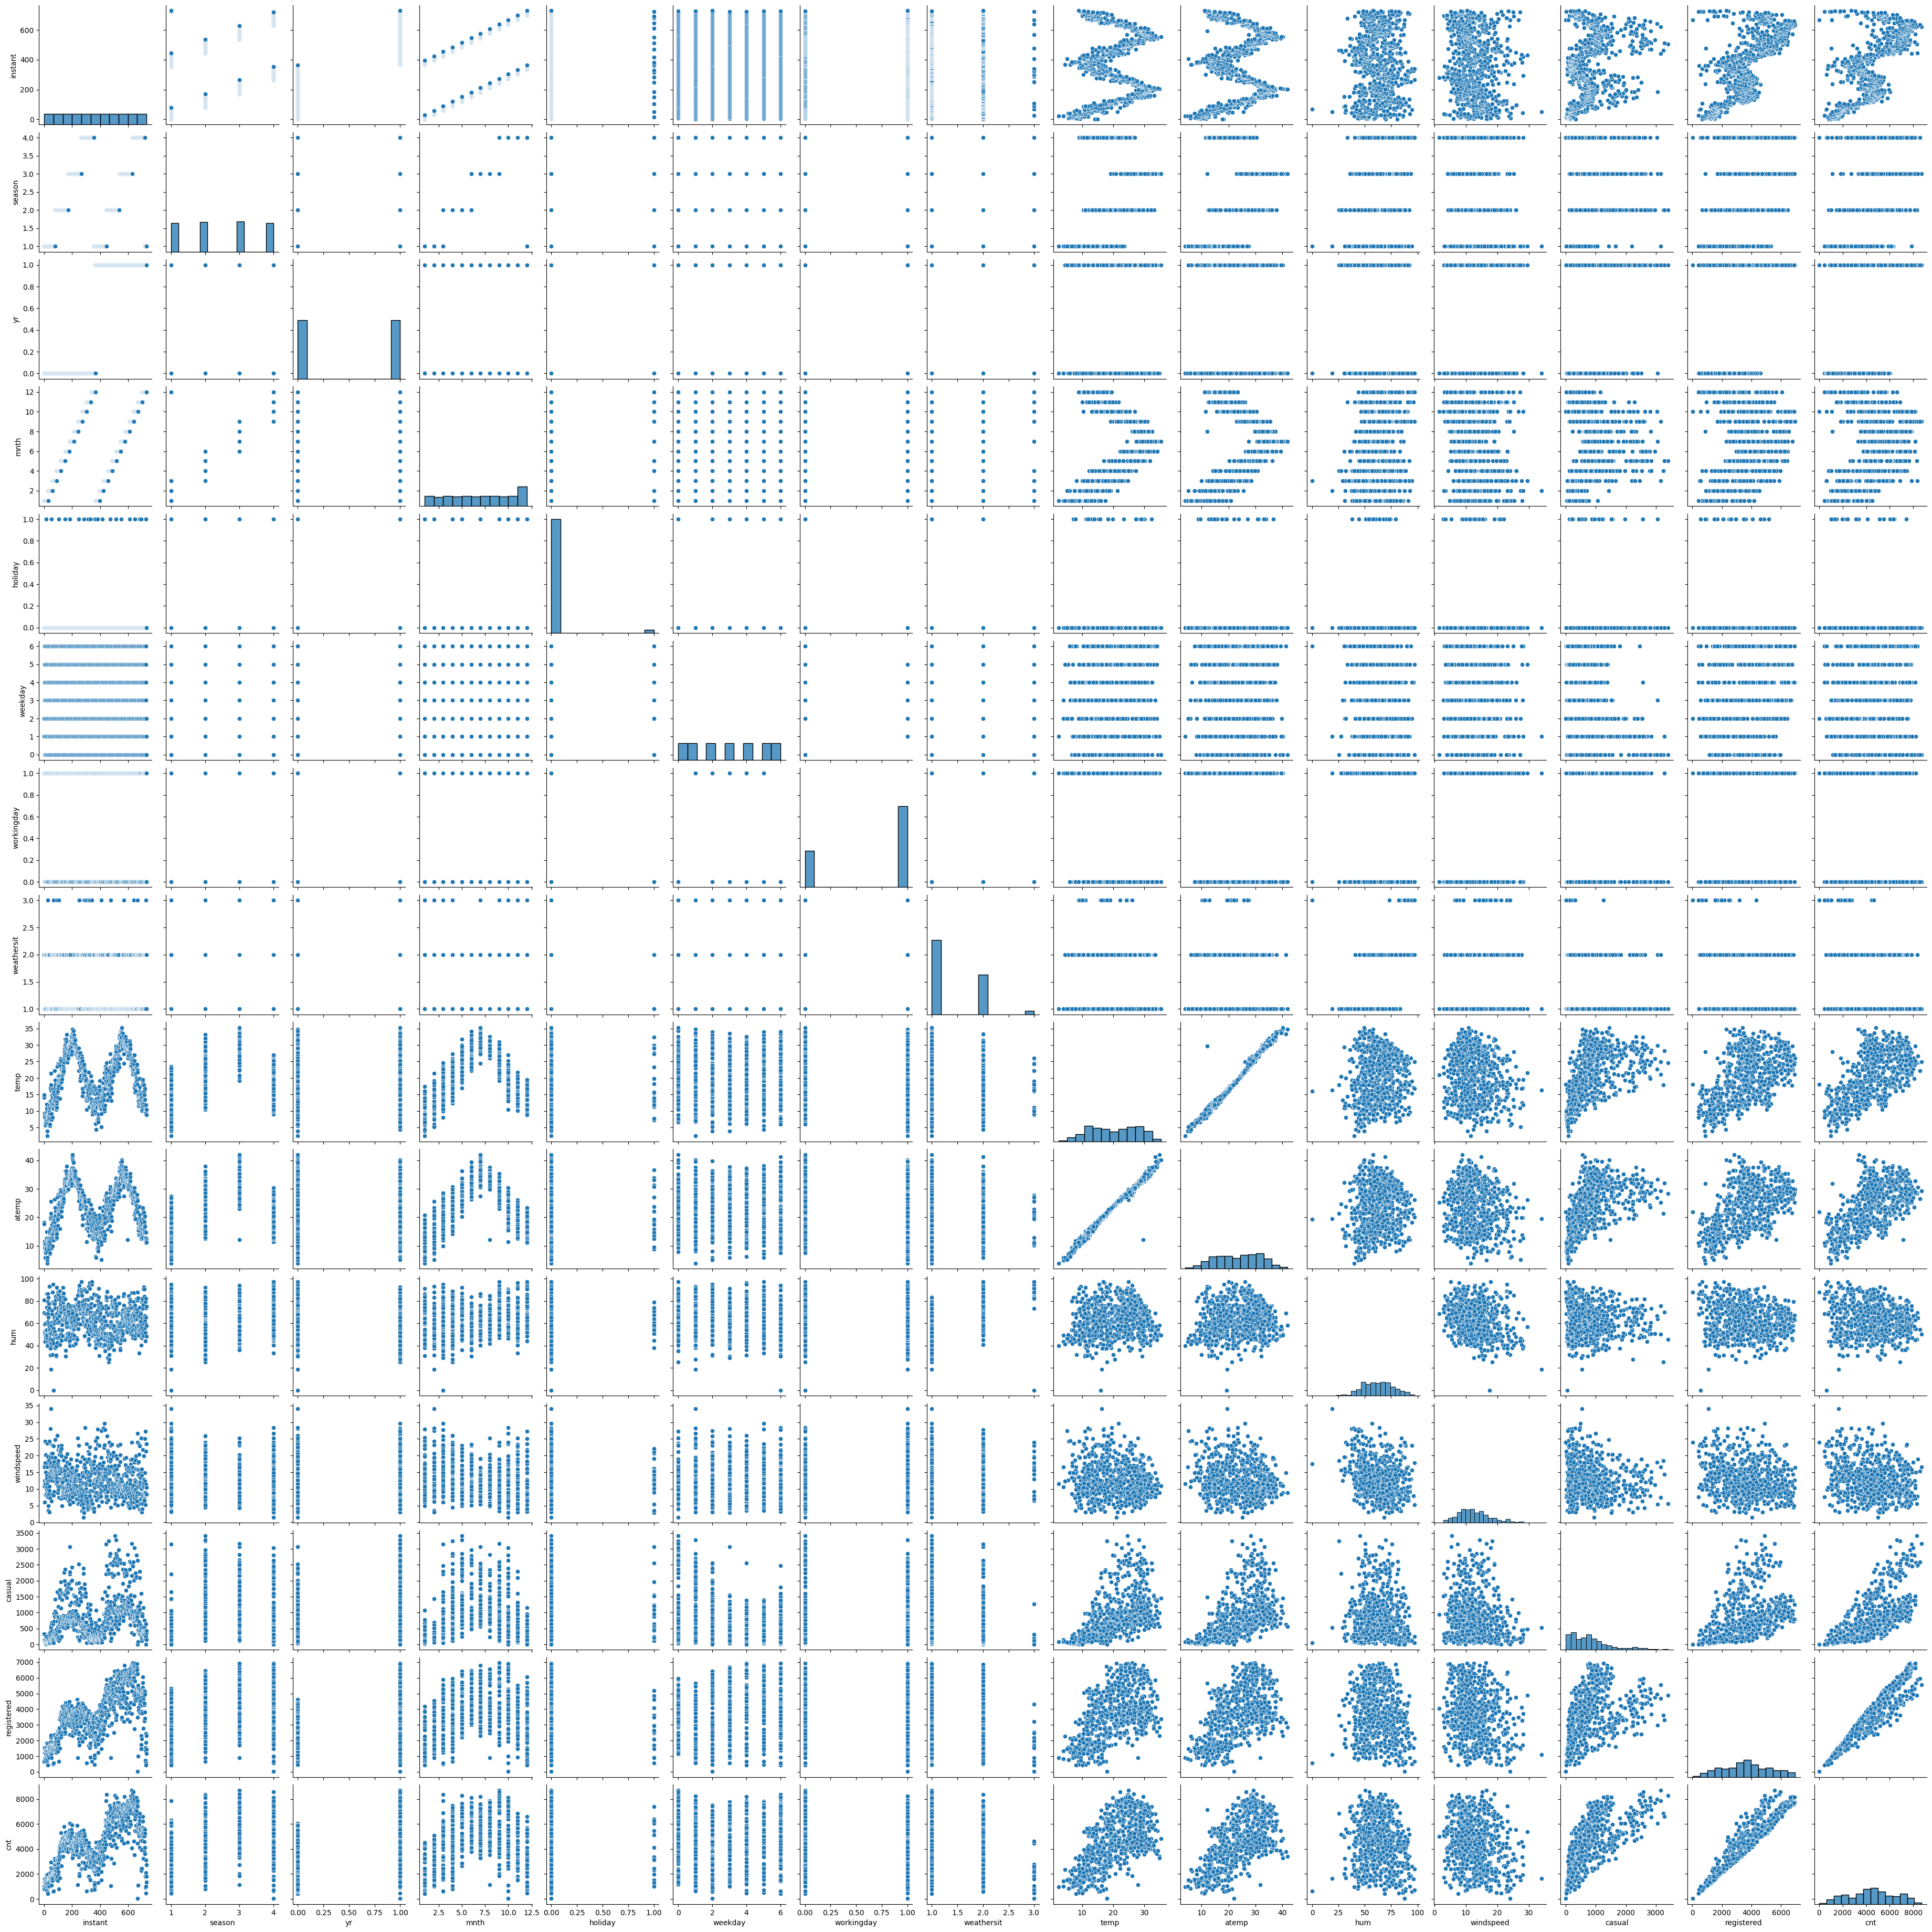

In [13]:
#Dependency analysis
sns.pairplot( df)

In [14]:
df.head()

instant               dteday  season  yr  mnth  holiday  weekday  \
0        1  2018-01-01 00:00:00       1   0     1        0        1   
1        2  2018-02-01 00:00:00       1   0     1        0        2   
2        3  2018-03-01 00:00:00       1   0     1        0        3   
3        4  2018-04-01 00:00:00       1   0     1        0        4   
4        5  2018-05-01 00:00:00       1   0     1        0        5   

   workingday  weathersit       temp     atemp      hum  windspeed  casual  \
0           1           2  14.110847  18.18125  80.5833  10.749882     331   
1           1           2  14.902598  17.68695  69.6087  16.652113     131   
2           1           1   8.050924   9.47025  43.7273  16.636703     120   
3           1           1   8.200000  10.60610  59.0435  10.739832     108   
4           1           1   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt  
0         654   985  
1         670   801  
2        1229  1349  
3        1454  1562  
4        1518  1600

In [15]:
print(df['weathersit'].unique())

[2 1 3]


In [16]:
# Map categorical variables to labels instead of number - weathersit
weathersit_mapping = {1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'}
df['weathersit'] = df['weathersit'].map(weathersit_mapping)

df[['weathersit']].head()

weathersit
0       Mist
1       Mist
2      Clear
3      Clear
4      Clear

In [17]:
print(df['weathersit'].unique())

['Mist' 'Clear' 'Light Snow']


In [18]:
df.head()

instant               dteday  season  yr  mnth  holiday  weekday  \
0        1  2018-01-01 00:00:00       1   0     1        0        1   
1        2  2018-02-01 00:00:00       1   0     1        0        2   
2        3  2018-03-01 00:00:00       1   0     1        0        3   
3        4  2018-04-01 00:00:00       1   0     1        0        4   
4        5  2018-05-01 00:00:00       1   0     1        0        5   

   workingday weathersit       temp     atemp      hum  windspeed  casual  \
0           1       Mist  14.110847  18.18125  80.5833  10.749882     331   
1           1       Mist  14.902598  17.68695  69.6087  16.652113     131   
2           1      Clear   8.050924   9.47025  43.7273  16.636703     120   
3           1      Clear   8.200000  10.60610  59.0435  10.739832     108   
4           1      Clear   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt  
0         654   985  
1         670   801  
2        1229  1349  
3        1454  1562  
4        1518  1600

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 91.4+ KB


<Axes: xlabel='weathersit', ylabel='cnt'>

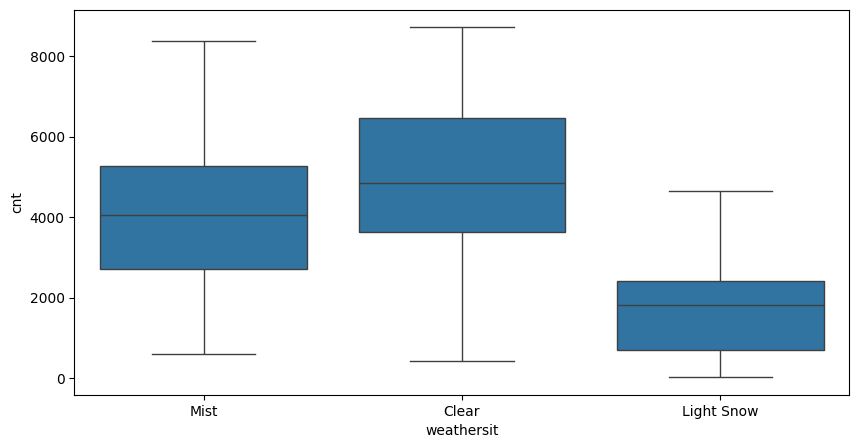

In [20]:
### Categorical Variable Analysis

plt.figure(figsize = (10,5))
sns.boxplot( x = 'weathersit', y = 'cnt', data = df )


In [21]:
### Cnt is high for clear weather and lowest for snow
### Spread is even in mist and clear weathers indicating no skew
### The spread of demand during light snow is uneven, with a shorter lower
#####  whisker and the median positioned closer to the upper quartile, indicating
#####  a left-skewed distribution. Although overall demand under light snow is
#####  lower than in other weather conditions, most observations cluster toward
##### the higher end of this reduced range. Extremely low usage occurs on only a
##### few days, suggesting a persistent baseline level of demand despite snowy
##### conditions.

In [22]:
### Dummy variables
### Define dummy variables - one-hot encoding. to convert categorizal values into numerical values


status = pd.get_dummies(df['weathersit'], drop_first = True)

status.head()

Light Snow   Mist
0       False   True
1       False   True
2       False  False
3       False  False
4       False  False

In [23]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Light Snow  730 non-null    bool 
 1   Mist        730 non-null    bool 
dtypes: bool(2)
memory usage: 1.6 KB


In [24]:
# Map categorical variables to labels instead of number - season
#(1:spring, 2:summer, 3:fall, 4:winter)
season_mapping = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
df['season'] = df['season'].map(season_mapping)

df[['season']].head()

season
0  spring
1  spring
2  spring
3  spring
4  spring

In [25]:
print(df['season'].unique())

['spring' 'summer' 'fall' 'winter']


In [26]:
df.head()

instant               dteday  season  yr  mnth  holiday  weekday  \
0        1  2018-01-01 00:00:00  spring   0     1        0        1   
1        2  2018-02-01 00:00:00  spring   0     1        0        2   
2        3  2018-03-01 00:00:00  spring   0     1        0        3   
3        4  2018-04-01 00:00:00  spring   0     1        0        4   
4        5  2018-05-01 00:00:00  spring   0     1        0        5   

   workingday weathersit       temp     atemp      hum  windspeed  casual  \
0           1       Mist  14.110847  18.18125  80.5833  10.749882     331   
1           1       Mist  14.902598  17.68695  69.6087  16.652113     131   
2           1      Clear   8.050924   9.47025  43.7273  16.636703     120   
3           1      Clear   8.200000  10.60610  59.0435  10.739832     108   
4           1      Clear   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt  
0         654   985  
1         670   801  
2        1229  1349  
3        1454  1562  
4        1518  1600

<Axes: xlabel='season', ylabel='cnt'>

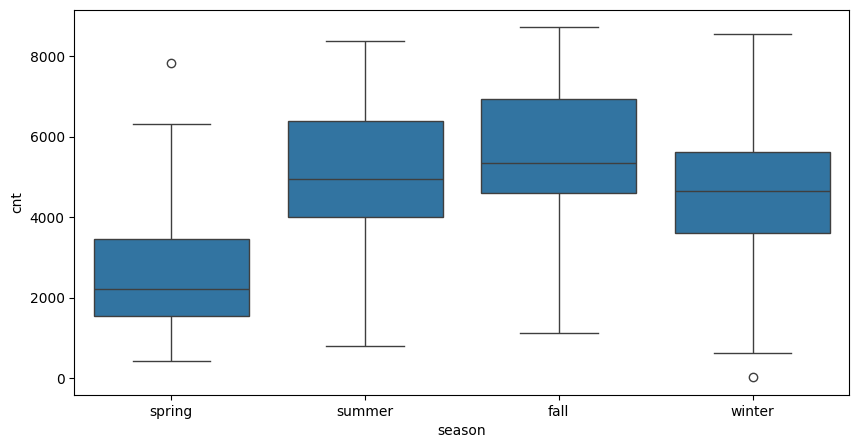

In [27]:
### Categorical Variable Analysis

plt.figure(figsize = (10,5))
sns.boxplot( x = 'season', y = 'cnt', data = df )

In [28]:
# Sprint has lowest usage and Fall being highest
# Winter and Summer are quite similar. Surprisingly !

<Axes: xlabel='season', ylabel='cnt'>

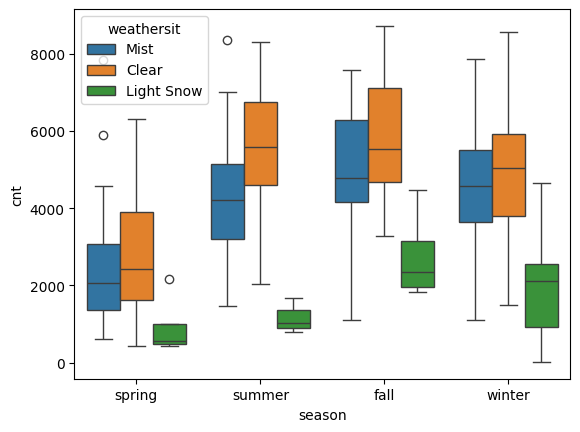

In [29]:
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = df )

In [30]:
# On a clear summer days the count is max as expected and is close to clear fall days
# mist days are close second to clear days.
# mist days of summer, fall and winter usage is higher than spring clear days
# winter and fall light snow days are preferred and higher usage than misty spring days
# snowy spring days are least with median right skew, indicating most points
# on the lower side
# Fall has most demand and is less affected by the weather compared to summer,
# which is impacted by the weather

In [31]:
### Dummy variables
### Define dummy variables - one-hot encoding. to convert categorizal values into numerical values


status = pd.get_dummies(df['season'], drop_first = True)

status.head()

spring  summer  winter
0    True   False   False
1    True   False   False
2    True   False   False
3    True   False   False
4    True   False   False

In [32]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   spring  730 non-null    bool 
 1   summer  730 non-null    bool 
 2   winter  730 non-null    bool 
dtypes: bool(3)
memory usage: 2.3 KB


In [33]:
df = pd.concat ([df,status], axis = 1)
df.head()

instant               dteday  season  yr  mnth  holiday  weekday  \
0        1  2018-01-01 00:00:00  spring   0     1        0        1   
1        2  2018-02-01 00:00:00  spring   0     1        0        2   
2        3  2018-03-01 00:00:00  spring   0     1        0        3   
3        4  2018-04-01 00:00:00  spring   0     1        0        4   
4        5  2018-05-01 00:00:00  spring   0     1        0        5   

   workingday weathersit       temp     atemp      hum  windspeed  casual  \
0           1       Mist  14.110847  18.18125  80.5833  10.749882     331   
1           1       Mist  14.902598  17.68695  69.6087  16.652113     131   
2           1      Clear   8.050924   9.47025  43.7273  16.636703     120   
3           1      Clear   8.200000  10.60610  59.0435  10.739832     108   
4           1      Clear   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt  spring  summer  winter  
0         654   985    True   False   False  
1         670   801    True   False   False  
2        1229  1349    True   False   False  
3        1454  1562    True   False   False  
4        1518  1600    True   False   False

In [34]:
df.drop(['weathersit'], axis = 1, inplace = True)
df.drop(['season'],axis =1, inplace = True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
 14  spring      730 non-null    bool   
 15  summer      730 non-null    bool   
 16  winter      730 non-null    bool   
dtypes: bool(3), float64(4), int64(9), object(1)
memory usage: 82.1+ KB


In [36]:
# count of holidays
print(df['holiday'].value_counts())

# count of working days
print(df['workingday'].value_counts())

total = df['holiday'] + df['workingday']
print(total)


holiday
0    709
1     21
Name: count, dtype: int64
workingday
1    504
0    226
Name: count, dtype: int64
0      1
1      1
2      1
3      1
4      1
      ..
725    1
726    0
727    0
728    1
729    1
Length: 730, dtype: int64


In [37]:
### holidays and working days are not directly dependant ??
### There are 21 holidays, where as 226 non-working days ??

In [38]:
## Map all categorical variables to labels instead of number
## yr (0: 2018, 1:2019)
### mnth :  months_dict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
### Holiday : (0: No, 1 :Yes)
### Weekday weekdays_dict = {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}
### workingday : (0: No, 1 :Yes)


In [39]:
# check unique vlaus for weekdays
print(df['weekday'].unique())

[1 2 3 4 5 6 0]


In [40]:
## Map all categorical variables to labels instead of number

# Define mappings directly as dictionaries for clarity and direct use with .map()
year_mapping = {0:'yr_2018', 1:'yr_2019'}
mnth_mapping = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
holiday_mapping = {0:'holiday_No', 1:'holiday_Yes'}
weekday_mapping = {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}
workingday_mapping = {0:'workingday_No', 1:'workingday_Yes'}

df['yr'] = df['yr'].map(year_mapping)
df['mnth'] = df['mnth'].map(mnth_mapping)
df['holiday'] = df['holiday'].map(holiday_mapping)
df['weekday'] = df['weekday'].map(weekday_mapping)
df['workingday'] = df['workingday'].map(workingday_mapping)

df.head()

instant               dteday       yr mnth     holiday weekday  \
0        1  2018-01-01 00:00:00  yr_2018  Jan  holiday_No     Mon   
1        2  2018-02-01 00:00:00  yr_2018  Jan  holiday_No     Tue   
2        3  2018-03-01 00:00:00  yr_2018  Jan  holiday_No     Wed   
3        4  2018-04-01 00:00:00  yr_2018  Jan  holiday_No     Thu   
4        5  2018-05-01 00:00:00  yr_2018  Jan  holiday_No     Fri   

       workingday       temp     atemp      hum  windspeed  casual  \
0  workingday_Yes  14.110847  18.18125  80.5833  10.749882     331   
1  workingday_Yes  14.902598  17.68695  69.6087  16.652113     131   
2  workingday_Yes   8.050924   9.47025  43.7273  16.636703     120   
3  workingday_Yes   8.200000  10.60610  59.0435  10.739832     108   
4  workingday_Yes   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt  spring  summer  winter  
0         654   985    True   False   False  
1         670   801    True   False   False  
2        1229  1349    True   False   False  
3        1454  1562    True   False   False  
4        1518  1600    True   False   False

In [41]:
### Dummy variables
### Define dummy variables - one-hot encoding. to convert categorizal values into numerical values

status = pd.get_dummies(df['yr'], drop_first = True)
status.head()


yr_2019
0    False
1    False
2    False
3    False
4    False

In [42]:
df = pd.concat ([df,status], axis = 1)
df.drop(['yr'], axis = 1, inplace = True)
df.head()


instant               dteday mnth     holiday weekday      workingday  \
0        1  2018-01-01 00:00:00  Jan  holiday_No     Mon  workingday_Yes   
1        2  2018-02-01 00:00:00  Jan  holiday_No     Tue  workingday_Yes   
2        3  2018-03-01 00:00:00  Jan  holiday_No     Wed  workingday_Yes   
3        4  2018-04-01 00:00:00  Jan  holiday_No     Thu  workingday_Yes   
4        5  2018-05-01 00:00:00  Jan  holiday_No     Fri  workingday_Yes   

        temp     atemp      hum  windspeed  casual  registered   cnt  spring  \
0  14.110847  18.18125  80.5833  10.749882     331         654   985    True   
1  14.902598  17.68695  69.6087  16.652113     131         670   801    True   
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349    True   
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562    True   
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600    True   

   summer  winter  yr_2019  
0   False   False    False  
1   False   False    False  
2   False   False    False  
3   False   False    False  
4   False   False    False

In [43]:
### Dummy variables
### Define dummy variables - one-hot encoding. to convert categorizal values into numerical values

status = pd.get_dummies(df['mnth'], drop_first = True, prefix='mnth')
df = pd.concat ([df,status], axis = 1)
df.drop(['mnth'], axis = 1, inplace = True)


status = pd.get_dummies(df['holiday'], drop_first = True, prefix='holiday')
df = pd.concat ([df,status], axis = 1)
df.drop(['holiday'], axis = 1, inplace = True)


status = pd.get_dummies(df['weekday'], drop_first = True, prefix='weekday')
df = pd.concat ([df,status], axis = 1)
df.drop(['weekday'], axis = 1, inplace = True)

status = pd.get_dummies(df['workingday'], drop_first = True, prefix='workingday')
df = pd.concat ([df,status], axis = 1)
df.drop(['workingday'], axis = 1, inplace = True)

df.head()

instant               dteday       temp     atemp      hum  windspeed  \
0        1  2018-01-01 00:00:00  14.110847  18.18125  80.5833  10.749882   
1        2  2018-02-01 00:00:00  14.902598  17.68695  69.6087  16.652113   
2        3  2018-03-01 00:00:00   8.050924   9.47025  43.7273  16.636703   
3        4  2018-04-01 00:00:00   8.200000  10.60610  59.0435  10.739832   
4        5  2018-05-01 00:00:00   9.305237  11.46350  43.6957  12.522300   

   casual  registered   cnt  spring  ...  mnth_Oct  mnth_Sep  \
0     331         654   985    True  ...     False     False   
1     131         670   801    True  ...     False     False   
2     120        1229  1349    True  ...     False     False   
3     108        1454  1562    True  ...     False     False   
4      82        1518  1600    True  ...     False     False   

   holiday_holiday_Yes  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
0                False         True        False        False        False   
1                False        False        False        False        False   
2                False        False        False        False        False   
3                False        False        False        False         True   
4                False        False        False        False        False   

   weekday_Tue  weekday_Wed  workingday_workingday_Yes  
0        False        False                       True  
1         True        False                       True  
2        False         True                       True  
3        False        False                       True  
4        False        False                       True  

[5 rows x 32 columns]

In [44]:
df.shape

(730, 32)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   instant                    730 non-null    int64  
 1   dteday                     730 non-null    object 
 2   temp                       730 non-null    float64
 3   atemp                      730 non-null    float64
 4   hum                        730 non-null    float64
 5   windspeed                  730 non-null    float64
 6   casual                     730 non-null    int64  
 7   registered                 730 non-null    int64  
 8   cnt                        730 non-null    int64  
 9   spring                     730 non-null    bool   
 10  summer                     730 non-null    bool   
 11  winter                     730 non-null    bool   
 12  yr_2019                    730 non-null    bool   
 13  mnth_Aug                   730 non-null    bool   

In [46]:
#### Train - Test Split

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,train_size = 0.7, test_size = 0.3, random_state = 100)


This code iterates through all columns in the DataFrame `df` that have a boolean data type. For each identified boolean column, it converts the column's data type to integer, where `True` becomes `1` and `False` becomes `0`. Finally, `df.head()` is displayed to show the updated DataFrame with the boolean columns converted.

# Convert all boolean columns to integer (0 or 1)
for col in df.select_dtypes(include='bool').columns:
    df[col] = df[col].astype(int)

df.head()

In [47]:
df_train.shape

(510, 32)

In [48]:
df_test.shape

(219, 32)

In [49]:
# Convert all boolean columns to integer (0 or 1)
for col in df_train.select_dtypes(include='bool').columns:
    df_train[col] = df_train[col].astype(int)

df_train.head()

instant               dteday       temp    atemp      hum  windspeed  \
653      654           16-10-2019  19.201653  23.0423  55.8333  12.208807   
576      577           31-07-2019  29.246653  33.1448  70.4167  11.083475   
426      427  2019-03-03 00:00:00  16.980847  20.6746  62.1250  10.792293   
728      729           30-12-2019  10.489153  11.5850  48.3333  23.500518   
482      483           28-04-2019  15.443347  18.8752  48.9583   8.708325   

     casual  registered   cnt  spring  ...  mnth_Oct  mnth_Sep  \
653     922        6612  7534       0  ...         1         0   
576     968        6248  7216       0  ...         0         0   
426     956        3110  4066       1  ...         0         0   
728     364        1432  1796       1  ...         0         0   
482    1120        3100  4220       0  ...         0         0   

     holiday_holiday_Yes  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
653                    0            0            0            0            0   
576                    0            0            0            0            0   
426                    0            0            0            1            0   
728                    0            1            0            0            0   
482                    0            0            0            1            0   

     weekday_Tue  weekday_Wed  workingday_workingday_Yes  
653            0            1                          1  
576            0            1                          1  
426            0            0                          0  
728            0            0                          1  
482            0            0                          0  

[5 rows x 32 columns]

In [50]:
# Convert all boolean columns to integer (0 or 1)
for col in df_test.select_dtypes(include='bool').columns:
    df_test[col] = df_test[col].astype(int)

df_test.head()

instant               dteday       temp     atemp      hum  windspeed  \
184      185  2018-04-07 00:00:00  29.793347  33.27085  63.7917   5.459106   
535      536           20-06-2019  32.082500  36.04875  59.2083   7.625404   
299      300           27-10-2018  19.270000  22.85230  81.2917  13.250121   
221      222  2018-10-08 00:00:00  31.433347  34.24915  42.4167  13.417286   
152      153  2018-02-06 00:00:00  29.315000  32.19710  30.5000  19.583229   

     casual  registered   cnt  spring  ...  mnth_Oct  mnth_Sep  \
184    3065        2978  6043       0  ...         0         0   
535     872        5339  6211       0  ...         0         0   
299     240        2419  2659       0  ...         1         0   
221     884        3896  4780       0  ...         0         0   
152     736        4232  4968       0  ...         0         0   

     holiday_holiday_Yes  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
184                    1            0            0            0            0   
535                    0            0            0            0            1   
299                    0            0            1            0            0   
221                    0            0            0            0            0   
152                    0            0            1            0            0   

     weekday_Tue  weekday_Wed  workingday_workingday_Yes  
184            0            1                          0  
535            0            0                          1  
299            0            0                          0  
221            0            0                          1  
152            0            0                          0  

[5 rows x 32 columns]

In [51]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   instant                    219 non-null    int64  
 1   dteday                     219 non-null    object 
 2   temp                       219 non-null    float64
 3   atemp                      219 non-null    float64
 4   hum                        219 non-null    float64
 5   windspeed                  219 non-null    float64
 6   casual                     219 non-null    int64  
 7   registered                 219 non-null    int64  
 8   cnt                        219 non-null    int64  
 9   spring                     219 non-null    int64  
 10  summer                     219 non-null    int64  
 11  winter                     219 non-null    int64  
 12  yr_2019                    219 non-null    int64  
 13  mnth_Aug                   219 non-null    int64  
 14

In [52]:
# Drop casual and registered from data for model

df_train.drop(['casual'], axis = 1, inplace = True)
df_test.drop(['casual'], axis = 1, inplace = True)

df_train.drop(['registered'], axis = 1, inplace = True)
df_test.drop(['registered'], axis = 1, inplace = True)


In [53]:
df_train.head()

instant               dteday       temp    atemp      hum  windspeed  \
653      654           16-10-2019  19.201653  23.0423  55.8333  12.208807   
576      577           31-07-2019  29.246653  33.1448  70.4167  11.083475   
426      427  2019-03-03 00:00:00  16.980847  20.6746  62.1250  10.792293   
728      729           30-12-2019  10.489153  11.5850  48.3333  23.500518   
482      483           28-04-2019  15.443347  18.8752  48.9583   8.708325   

      cnt  spring  summer  winter  ...  mnth_Oct  mnth_Sep  \
653  7534       0       0       1  ...         1         0   
576  7216       0       0       0  ...         0         0   
426  4066       1       0       0  ...         0         0   
728  1796       1       0       0  ...         0         0   
482  4220       0       1       0  ...         0         0   

     holiday_holiday_Yes  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
653                    0            0            0            0            0   
576                    0            0            0            0            0   
426                    0            0            0            1            0   
728                    0            1            0            0            0   
482                    0            0            0            1            0   

     weekday_Tue  weekday_Wed  workingday_workingday_Yes  
653            0            1                          1  
576            0            1                          1  
426            0            0                          0  
728            0            0                          1  
482            0            0                          0  

[5 rows x 30 columns]

In [54]:
df_train.shape

(510, 30)

In [55]:
df_test.shape

(219, 30)

In [56]:
### Scale

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_var = ['temp','atemp',  'hum','windspeed']


df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [58]:
df_train.describe()

instant        temp       atemp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000   
mean   368.941176    0.537262    0.512989    0.650369    0.320768   
std    209.868619    0.225844    0.212385    0.145882    0.169797   
min      1.000000    0.000000    0.000000    0.000000    0.000000   
25%    187.250000    0.339853    0.332086    0.538643    0.199179   
50%    373.000000    0.540519    0.526811    0.653714    0.296763   
75%    553.750000    0.735215    0.688457    0.754830    0.414447   
max    729.000000    1.000000    1.000000    1.000000    1.000000   

               cnt      spring      summer     winter     yr_2019  ...  \
count   510.000000  510.000000  510.000000  510.00000  510.000000  ...   
mean   4486.382353    0.243137    0.245098    0.24902    0.507843  ...   
std    1952.158739    0.429398    0.430568    0.43287    0.500429  ...   
min      22.000000    0.000000    0.000000    0.00000    0.000000  ...   
25%    3120.000000    0.000000    0.000000    0.00000    0.000000  ...   
50%    4530.000000    0.000000    0.000000    0.00000    1.000000  ...   
75%    5973.500000    0.000000    0.000000    0.00000    1.000000  ...   
max    8714.000000    1.000000    1.000000    1.00000    1.000000  ...   

         mnth_Oct    mnth_Sep  holiday_holiday_Yes  weekday_Mon  weekday_Sat  \
count  510.000000  510.000000           510.000000   510.000000   510.000000   
mean     0.086275    0.080392             0.025490     0.154902     0.129412   
std      0.281045    0.272166             0.157763     0.362166     0.335985   
min      0.000000    0.000000             0.000000     0.000000     0.000000   
25%      0.000000    0.000000             0.000000     0.000000     0.000000   
50%      0.000000    0.000000             0.000000     0.000000     0.000000   
75%      0.000000    0.000000             0.000000     0.000000     0.000000   
max      1.000000    1.000000             1.000000     1.000000     1.000000   

       weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  \
count   510.000000   510.000000   510.000000   510.000000   
mean      0.137255     0.143137     0.152941     0.135294   
std       0.344454     0.350557     0.360284     0.342373   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000   

       workingday_workingday_Yes  
count                 510.000000  
mean                    0.711765  
std                     0.453386  
min                     0.000000  
25%                     0.000000  
50%                     1.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 29 columns]

In [59]:
# instant index
df_train.drop(['instant'], axis = 1, inplace = True)

In [60]:
df_train.head()

dteday      temp     atemp       hum  windspeed   cnt  \
653           16-10-2019  0.509887  0.501133  0.575354   0.300794  7534   
576           31-07-2019  0.815169  0.766351  0.725633   0.264686  7216   
426  2019-03-03 00:00:00  0.442393  0.438975  0.640189   0.255342  4066   
728           30-12-2019  0.245101  0.200348  0.498067   0.663106  1796   
482           28-04-2019  0.395666  0.391735  0.504508   0.188475  4220   

     spring  summer  winter  yr_2019  ...  mnth_Oct  mnth_Sep  \
653       0       0       1        1  ...         1         0   
576       0       0       0        1  ...         0         0   
426       1       0       0        1  ...         0         0   
728       1       0       0        1  ...         0         0   
482       0       1       0        1  ...         0         0   

     holiday_holiday_Yes  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
653                    0            0            0            0            0   
576                    0            0            0            0            0   
426                    0            0            0            1            0   
728                    0            1            0            0            0   
482                    0            0            0            1            0   

     weekday_Tue  weekday_Wed  workingday_workingday_Yes  
653            0            1                          1  
576            0            1                          1  
426            0            0                          0  
728            0            0                          1  
482            0            0                          0  

[5 rows x 29 columns]

In [61]:
df_test.drop(['instant'], axis = 1, inplace = True)
df_test.head()

dteday       temp     atemp      hum  windspeed   cnt  \
184  2018-04-07 00:00:00  29.793347  33.27085  63.7917   5.459106  6043   
535           20-06-2019  32.082500  36.04875  59.2083   7.625404  6211   
299           27-10-2018  19.270000  22.85230  81.2917  13.250121  2659   
221  2018-10-08 00:00:00  31.433347  34.24915  42.4167  13.417286  4780   
152  2018-02-06 00:00:00  29.315000  32.19710  30.5000  19.583229  4968   

     spring  summer  winter  yr_2019  ...  mnth_Oct  mnth_Sep  \
184       0       0       0        0  ...         0         0   
535       0       1       0        1  ...         0         0   
299       0       0       1        0  ...         1         0   
221       0       0       0        0  ...         0         0   
152       0       1       0        0  ...         0         0   

     holiday_holiday_Yes  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
184                    1            0            0            0            0   
535                    0            0            0            0            1   
299                    0            0            1            0            0   
221                    0            0            0            0            0   
152                    0            0            1            0            0   

     weekday_Tue  weekday_Wed  workingday_workingday_Yes  
184            0            1                          0  
535            0            0                          1  
299            0            0                          0  
221            0            0                          1  
152            0            0                          0  

[5 rows x 29 columns]

In [62]:
## Drop dteday
df_train.drop(['dteday'], axis = 1, inplace = True)
df_test.drop(['dteday'], axis = 1, inplace = True)

In [63]:
df_train.shape

(510, 28)

In [64]:
df_test.shape

(219, 28)

In [65]:
### Validate Assumptions of LR

<Axes: >

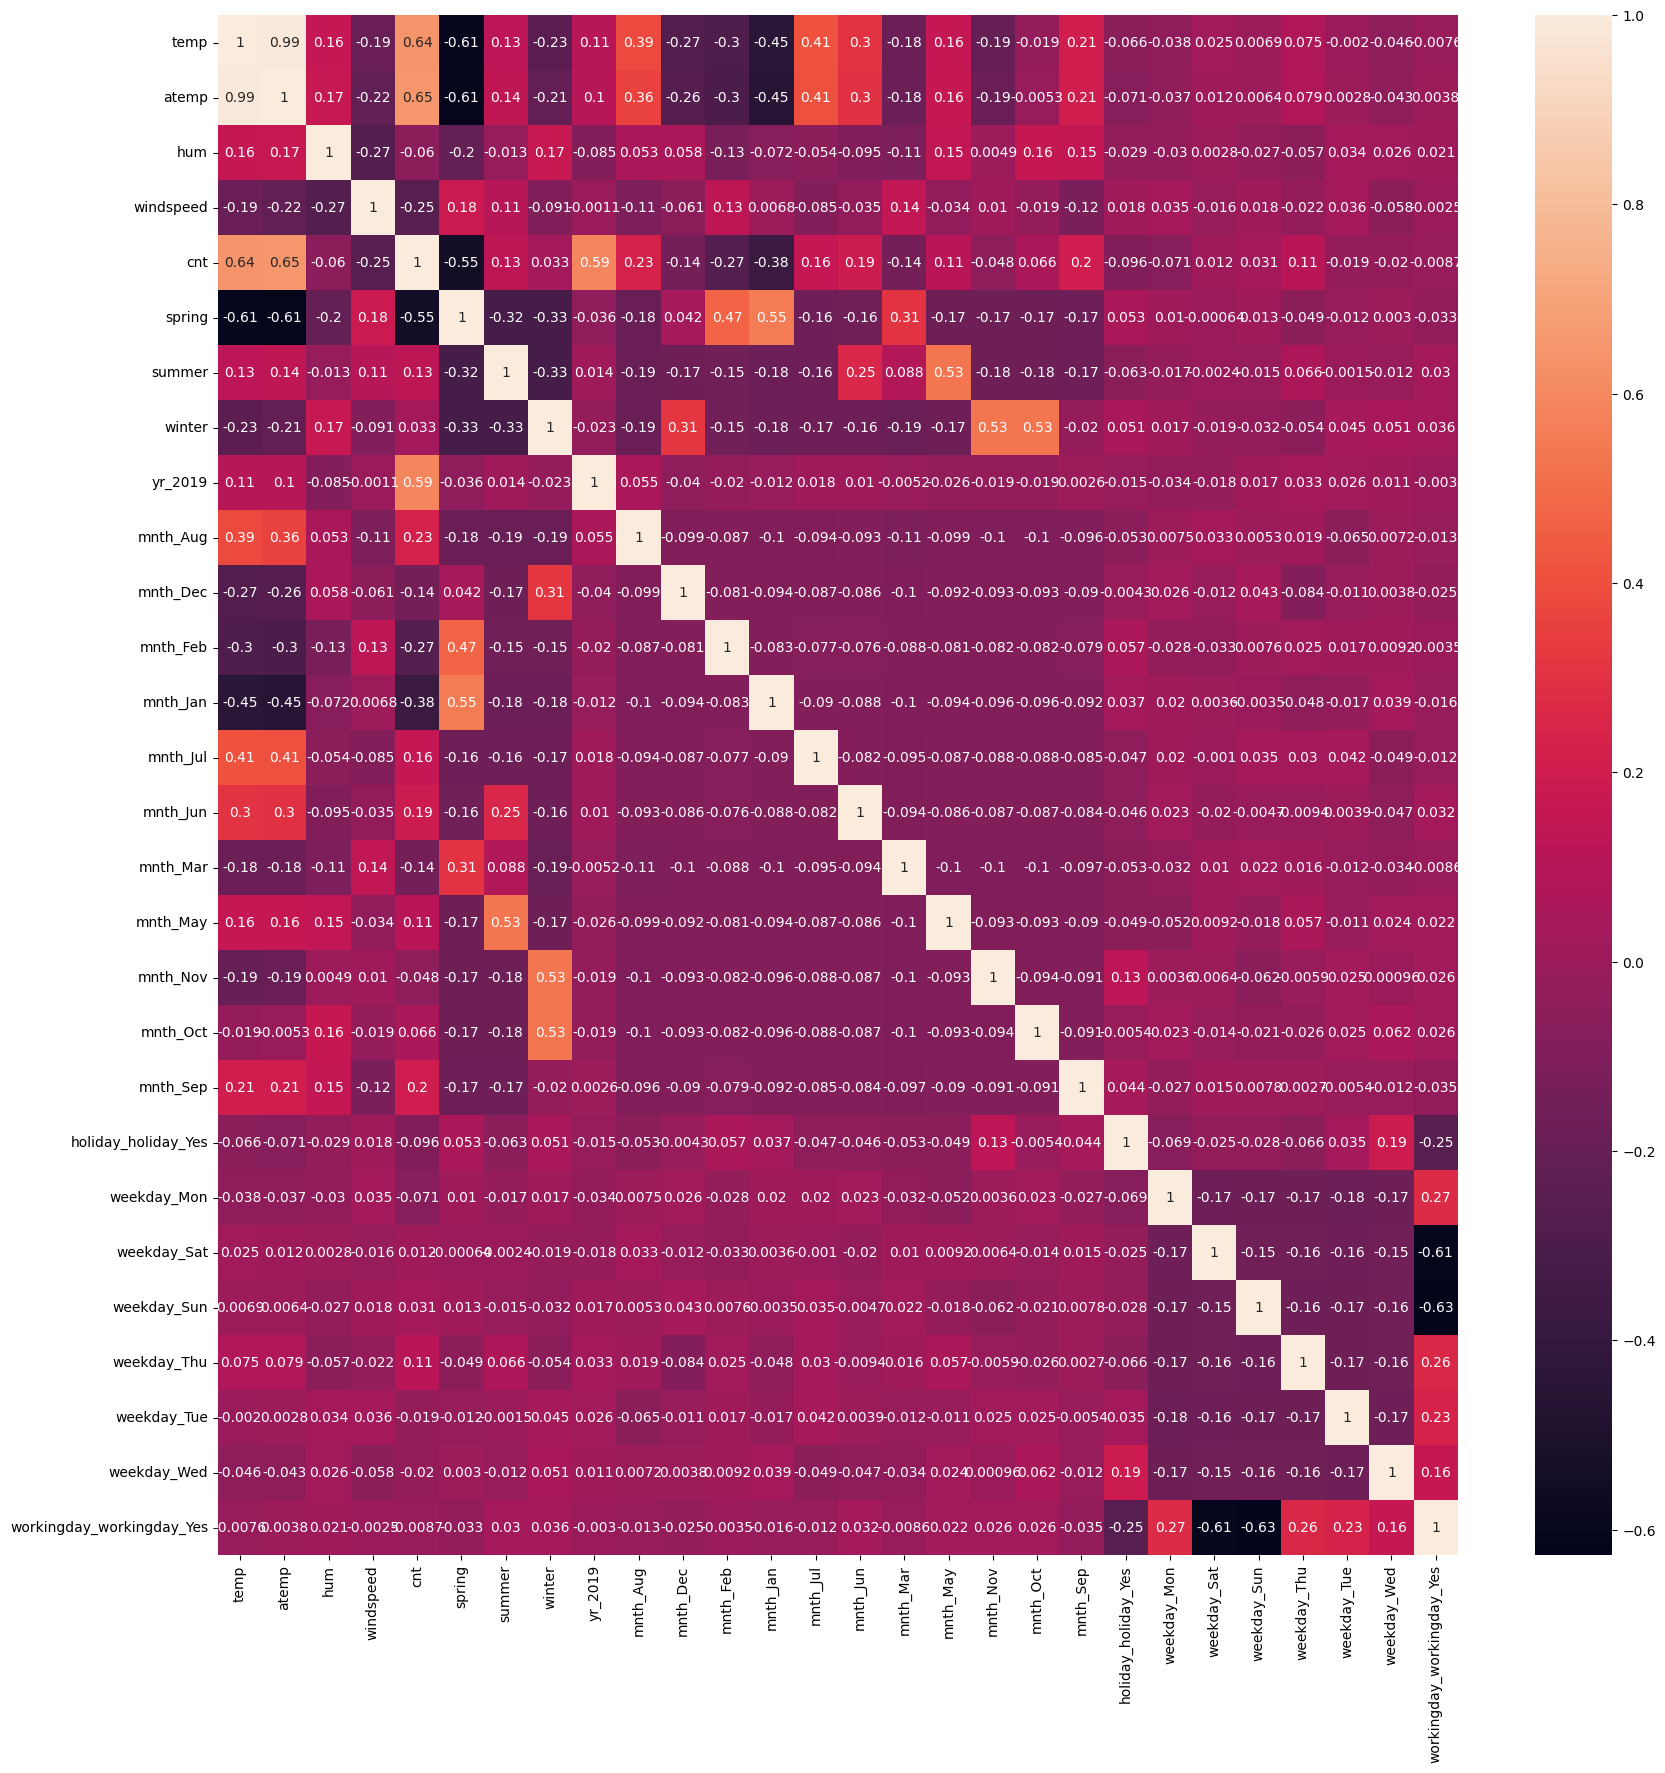

In [66]:
plt.figure(figsize = (20,20))
sns.heatmap(df_train.corr(), annot = True)


In [67]:
### very high correlation between temp and atemp
# drop atemp

df_train.drop(['atemp'], axis = 1, inplace = True)
df_test.drop(['atemp'], axis = 1, inplace = True)

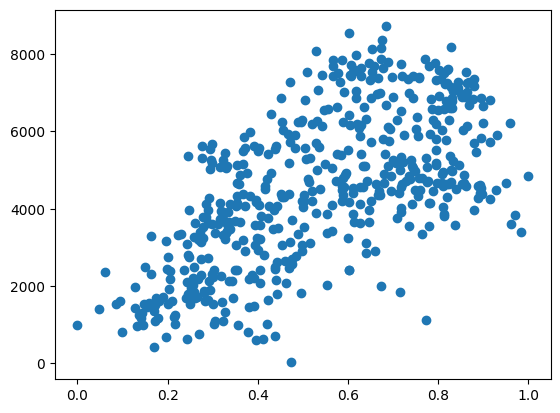

In [68]:
plt.scatter(df_train.temp, df_train.cnt)

In [69]:
y_train = df_train.pop('cnt')
x_train = df_train

In [70]:
y_train.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: cnt, dtype: int64

In [71]:
#### Use stats model to buil LR

x_train.head()

temp       hum  windspeed  spring  summer  winter  yr_2019  mnth_Aug  \
653  0.509887  0.575354   0.300794       0       0       1        1         0   
576  0.815169  0.725633   0.264686       0       0       0        1         0   
426  0.442393  0.640189   0.255342       1       0       0        1         0   
728  0.245101  0.498067   0.663106       1       0       0        1         0   
482  0.395666  0.504508   0.188475       0       1       0        1         0   

     mnth_Dec  mnth_Feb  ...  mnth_Oct  mnth_Sep  holiday_holiday_Yes  \
653         0         0  ...         1         0                    0   
576         0         0  ...         0         0                    0   
426         0         0  ...         0         0                    0   
728         1         0  ...         0         0                    0   
482         0         0  ...         0         0                    0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
653            0            0            0            0            0   
576            0            0            0            0            0   
426            0            0            1            0            0   
728            1            0            0            0            0   
482            0            0            1            0            0   

     weekday_Wed  workingday_workingday_Yes  
653            1                          1  
576            1                          1  
426            0                          0  
728            0                          1  
482            0                          0  

[5 rows x 26 columns]

In [72]:
import pandas as pd
import statsmodels.api as sm

# 1. Reset index to avoid alignment issues
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# 2. Convert all X columns to numeric (coerce bad values to NaN)
x_train = x_train.apply(pd.to_numeric, errors='coerce')

# 3. Convert y to numeric
y_train = pd.to_numeric(y_train, errors='coerce')

# 4. Drop any NaNs introduced during conversion
df_clean = pd.concat([x_train, y_train], axis=1).dropna()
x_train_clean = df_clean[x_train.columns]
y_train_clean = df_clean[y_train.name]

# 5. Add intercept
x_train_clean = sm.add_constant(x_train_clean)

# 6. Fit model
lr = sm.OLS(y_train_clean, x_train_clean).fit()

print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     85.20
Date:                Sun, 28 Dec 2025   Prob (F-statistic):          4.01e-162
Time:                        06:23:02   Log-Likelihood:                -4148.6
No. Observations:                 510   AIC:                             8351.
Df Residuals:                     483   BIC:                             8466.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [73]:
lr.params

const                        3831.500476
temp                         4554.371988
hum                         -3051.006801
windspeed                   -2040.275387
spring                       -203.513836
summer                        470.729624
winter                       1053.734048
yr_2019                      1994.046235
mnth_Aug                      205.666195
mnth_Dec                     -209.234352
mnth_Feb                     -282.332888
mnth_Jan                     -420.711154
mnth_Jul                     -368.292016
mnth_Jun                      -34.928173
mnth_Mar                        0.213847
mnth_May                      262.761908
mnth_Nov                     -251.340335
mnth_Oct                       21.214047
mnth_Sep                      764.867504
holiday_holiday_Yes         -1032.788186
weekday_Mon                  -152.947299
weekday_Sat                  -424.449449
weekday_Sun                  -329.377667
weekday_Thu                   147.584886
weekday_Tue                  -100.877920
weekday_Wed                   -35.090624
workingday_workingday_Yes    -455.550981
dtype: float64

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_clean.columns
vif['VIF'] = [variance_inflation_factor(x_train_clean.values, i) for i in range(x_train_clean.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                       const  461.61
26  workingday_workingday_Yes   66.29
22                weekday_Sun   38.77
21                weekday_Sat   36.98
4                      spring   10.74
6                      winter    9.49
5                      summer    8.27
1                        temp    6.85
19        holiday_holiday_Yes    6.79
16                   mnth_Nov    6.78
17                   mnth_Oct    6.58
8                    mnth_Aug    6.42
11                   mnth_Jan    5.89
12                   mnth_Jul    5.68
9                    mnth_Dec    5.64
18                   mnth_Sep    4.93
10                   mnth_Feb    4.41
14                   mnth_Mar    3.47
13                   mnth_Jun    2.83
15                   mnth_May    2.22
20                weekday_Mon    1.78
24                weekday_Tue    1.77
23                weekday_Thu    1.74
25                weekday_Wed    1.74
2                         hum    1.28
3                   windspeed    1.20
7                     yr_2019    1.06

In [79]:
# drop workingday_workingday_Yes with high VIF
x_train_clean = x_train_clean.drop(['workingday_workingday_Yes'], axis = 1 )

In [80]:
x_train_lm = sm.add_constant(x_train_clean)
lr2 = sm.OLS(y_train_clean, x_train_lm).fit()

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     88.68
Date:                Sun, 28 Dec 2025   Prob (F-statistic):          5.27e-163
Time:                        06:38:38   Log-Likelihood:                -4148.8
No. Observations:                 510   AIC:                             8350.
Df Residuals:                     484   BIC:                             8460.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3367.1068    

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_clean.columns
vif['VIF'] = [variance_inflation_factor(x_train_clean.values, i) for i in range(x_train_clean.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                 const  125.83
4                spring   10.74
6                winter    9.48
5                summer    8.27
1                  temp    6.84
16             mnth_Nov    6.77
17             mnth_Oct    6.58
8              mnth_Aug    6.42
11             mnth_Jan    5.89
12             mnth_Jul    5.68
9              mnth_Dec    5.64
18             mnth_Sep    4.93
10             mnth_Feb    4.41
14             mnth_Mar    3.47
13             mnth_Jun    2.83
15             mnth_May    2.22
20          weekday_Mon    1.78
24          weekday_Tue    1.77
25          weekday_Wed    1.74
23          weekday_Thu    1.74
22          weekday_Sun    1.70
21          weekday_Sat    1.65
2                   hum    1.28
3             windspeed    1.19
19  holiday_holiday_Yes    1.09
7               yr_2019    1.05

In [82]:
# drop spring with high VIF
x_train_clean = x_train_clean.drop(['spring'], axis = 1 )

In [83]:
x_train_lm = sm.add_constant(x_train_clean)
lr2 = sm.OLS(y_train_clean, x_train_lm).fit()

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     92.46
Date:                Sun, 28 Dec 2025   Prob (F-statistic):          6.92e-164
Time:                        06:40:18   Log-Likelihood:                -4149.1
No. Observations:                 510   AIC:                             8348.
Df Residuals:                     485   BIC:                             8454.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3242.4706    

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_clean.columns
vif['VIF'] = [variance_inflation_factor(x_train_clean.values, i) for i in range(x_train_clean.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                 const  103.46
15             mnth_Nov    6.77
1                  temp    6.75
16             mnth_Oct    6.58
5                winter    6.08
8              mnth_Dec    5.60
10             mnth_Jan    5.19
7              mnth_Aug    5.10
4                summer    4.74
11             mnth_Jul    4.64
17             mnth_Sep    4.22
9              mnth_Feb    3.84
13             mnth_Mar    3.11
12             mnth_Jun    2.73
14             mnth_May    2.21
23          weekday_Tue    1.77
19          weekday_Mon    1.77
24          weekday_Wed    1.74
22          weekday_Thu    1.74
21          weekday_Sun    1.70
20          weekday_Sat    1.65
2                   hum    1.28
3             windspeed    1.19
18  holiday_holiday_Yes    1.09
6               yr_2019    1.05

In [86]:
# mnth_Nov
# drop  mnth_Nov with high VIF
x_train_clean = x_train_clean.drop(['mnth_Nov'], axis = 1 )

In [87]:
x_train_lm = sm.add_constant(x_train_clean)
lr2 = sm.OLS(y_train_clean, x_train_lm).fit()

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     96.54
Date:                Sun, 28 Dec 2025   Prob (F-statistic):          9.09e-165
Time:                        06:42:20   Log-Likelihood:                -4149.4
No. Observations:                 510   AIC:                             8347.
Df Residuals:                     486   BIC:                             8448.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3109.4540    

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_clean.columns
vif['VIF'] = [variance_inflation_factor(x_train_clean.values, i) for i in range(x_train_clean.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 const  80.15
1                  temp   6.53
7              mnth_Aug   3.96
5                winter   3.84
11             mnth_Jul   3.80
10             mnth_Jan   3.30
4                summer   3.25
16             mnth_Sep   2.59
12             mnth_Jun   2.50
9              mnth_Feb   2.48
14             mnth_May   2.11
13             mnth_Mar   2.10
15             mnth_Oct   1.86
18          weekday_Mon   1.77
22          weekday_Tue   1.76
8              mnth_Dec   1.75
21          weekday_Thu   1.74
23          weekday_Wed   1.73
20          weekday_Sun   1.69
19          weekday_Sat   1.65
2                   hum   1.27
3             windspeed   1.19
17  holiday_holiday_Yes   1.08
6               yr_2019   1.05

In [89]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     96.54
Date:                Sun, 28 Dec 2025   Prob (F-statistic):          9.09e-165
Time:                        06:44:19   Log-Likelihood:                -4149.4
No. Observations:                 510   AIC:                             8347.
Df Residuals:                     486   BIC:                             8448.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3109.4540    

In [ ]:
### Only temp is high VIF.. nothing else.. the std dev is still very high


In [90]:
## One last one try dropping temp as its correlated with months
# drop  temp with high VIF
x_train_clean = x_train_clean.drop(['temp'], axis = 1 )


In [91]:
x_train_lm = sm.add_constant(x_train_clean)
lr2 = sm.OLS(y_train_clean, x_train_lm).fit()

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     76.67
Date:                Sun, 28 Dec 2025   Prob (F-statistic):          1.29e-142
Time:                        06:46:57   Log-Likelihood:                -4205.8
No. Observations:                 510   AIC:                             8458.
Df Residuals:                     487   BIC:                             8555.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4948.1408    

In [ ]:
### No change in std err !!!

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_clean.columns
vif['VIF'] = [variance_inflation_factor(x_train_clean.values, i) for i in range(x_train_clean.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 const  60.16
4                winter   3.73
3                summer   3.25
6              mnth_Aug   2.82
9              mnth_Jan   2.59
10             mnth_Jul   2.47
8              mnth_Feb   2.20
15             mnth_Sep   2.13
12             mnth_Mar   2.06
13             mnth_May   1.85
17          weekday_Mon   1.76
21          weekday_Tue   1.76
14             mnth_Oct   1.75
20          weekday_Thu   1.74
22          weekday_Wed   1.73
19          weekday_Sun   1.69
11             mnth_Jun   1.69
7              mnth_Dec   1.66
18          weekday_Sat   1.65
1                   hum   1.23
2             windspeed   1.19
16  holiday_holiday_Yes   1.08
5               yr_2019   1.02

In [ ]:
### All festures are less than 5 VIF.. still std err is high

In [93]:
#Repeat the process for test data

In [ ]:
df_test[num_var] = scaler.transform (df_test[num_var])

In [ ]:
df_test.describe()

In [ ]:
y_test = df_test.pop('price')

In [ ]:
x_test = df_test

In [ ]:
x_test = x_test.drop(['bedrooms'], axis = 1 )

In [ ]:
x_test_sm = sm.add_constant ( x_test)

In [ ]:
x_test_sm.head()

In [ ]:
y_test_pred = lr2.predict(x_test_sm)

In [ ]:
plt.scatter(y_test, y_test_pred)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

In [ ]:
r2_score(y_test, y_test_pred)